# D212 Data Mining II Performance Assessment Task 3
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D212 assessment for Data Mining II.  This notebook will be used in conjunction with a written document to perform Market Basket Analysis.  Concepts that will be explored in this notebook will be:

- Perform Market Basket Analysis
- Data preparation 
- Data Analysis.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information about the dataframe. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
from pandas.plotting import parallel_coordinates


In [2]:
warnings.filterwarnings('ignore')

# Show all columns.
pd.set_option('display.max_columns', None)

In [3]:
# Read in the File
medical_market_df = pd.read_csv('medical_market_basket.csv')

# Print the contents of the dataframe and some information about it.
medical_market_df.info()
medical_market_df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


,0,1,2,3,4
Presc01,NaN,amlodipine,NaN,citalopram,NaN
Presc02,NaN,albuterol aerosol,NaN,benicar,NaN
Presc03,NaN,allopurinol,NaN,amphetamine salt combo xr,NaN
Presc04,NaN,pantoprazole,NaN,NaN,NaN
Presc05,NaN,lorazepam,NaN,NaN,NaN
Presc06,NaN,omeprazole,NaN,NaN,NaN
Presc07,NaN,mometasone,NaN,NaN,NaN
Presc08,NaN,fluconozole,NaN,NaN,NaN
Presc09,NaN,gabapentin,NaN,NaN,NaN
Presc10,NaN,pravastatin,NaN,NaN,NaN


## Section A can be found in the written document.

This written part of the asseesment can be found in the Word document that accompanies this Notebook.

## Section B can be found in the written document. 

This section contains the code to display a sample transaction from the dataframe.  A screenshot of this will be found in the written document in section B.

In [4]:
# B2. Print a sample transaction to show the alyout of the transaction.
medical_market_df.iloc[7401]

Presc01        glyburide
Presc02       alprazolam
Presc03    acetaminophen
Presc04              NaN
Presc05              NaN
Presc06              NaN
Presc07              NaN
Presc08              NaN
Presc09              NaN
Presc10              NaN
Presc11              NaN
Presc12              NaN
Presc13              NaN
Presc14              NaN
Presc15              NaN
Presc16              NaN
Presc17              NaN
Presc18              NaN
Presc19              NaN
Presc20              NaN
Name: 7401, dtype: object

# Sections C Data Preparation 

This section ofthe notebook will handle the cleaning and the preparation of the data. This prpeparation will make the datasready to be used for market basket analysis. 

The steps that will be ahndled in this section are the following:
- 1) Drop the empty rows from the frame.
- 2) Create a list of lists for the prescription transactions.
- 3) Encode the data to be ready for use.
- 4) Output the cleaned data to a CSV file.

## C1. Data Transformation

### Step 1: Drop the empty rows from the dataframe.

The CSV file that was provided included rows that did not contain any data in them.  These rows will be dropped sinse they server no real purpsoe and do not aid in analysis.  The code that is shown below. 

In [5]:
columns=['Presc01', 'Presc02', 'Presc03', 'Presc04', 'Presc05', 'Presc06'
         ,'Presc07', 'Presc08','Presc09', 'Presc10','Presc11'
         ,'Presc12','Presc13','Presc14','Presc15','Presc16' ,'Presc17'
         ,'Presc18','Presc19', 'Presc20']

# Setting the thresh (threshold) will require at least one column in the row to have 
# a valid value. If there are no values in the row then then row will be dropped 
# from the frame.

medical_market_df = medical_market_df.dropna(subset=columns, axis=0
                                                     , thresh=1, inplace=False)


In [6]:
# Reset the index so it accurately reflects the number of elements in the dataframe.
medical_market_df.reset_index(inplace=True, drop=True)


In [7]:
#medical_market_df.info()

In [8]:
#medical_market_df.head(5).T

In [9]:
#medical_market_df.tail(5).T

In [10]:
# Print a specific row from the frame.
#print("Row contents: ", medical_market_df.loc[[7500]])


### Step 2:  Create a list of lists for the prescription transactions.
In this step there will be a creation of a master list of transaction.  Any cell that has a valid non-NaN value will be addedd to the list. If the cell contains a NaN it this value will not be added to the list. This list will then be used to provide an argument for the tranaction encoding in Step 4.

In [11]:
list_of_transactions = []       # master list of transactions

# Iterate through the rows and within the row process the contents of 
# the columns.
for row  in range(len(medical_market_df)):
    # Create a list with transaction for the current row.
    row_transaction_list = []
    for cell in range(len(medical_market_df.columns)):
        if not pd.isnull(medical_market_df.iloc[row, cell]):
           row_transaction_list.append(str(medical_market_df.values[row, cell]))
    
    # Append the row tranasction list to the main list of transactions.
    list_of_transactions.append(row_transaction_list)

Check to see if the list has been created.  **Note:** Can be commented out not needed for the program. It is just included as a check of the list creations. 

In [12]:
#print(list_of_transactions)
print("\n\nIndex 0:", list_of_transactions[0])
print("\nIndex 7500: ",list_of_transactions[7500])



Index 0: ['amlodipine', 'albuterol aerosol', 'allopurinol', 'pantoprazole', 'lorazepam', 'omeprazole', 'mometasone', 'fluconozole', 'gabapentin', 'pravastatin', 'cialis', 'losartan', 'metoprolol succinate XL', 'sulfamethoxazole', 'abilify', 'spironolactone', 'albuterol HFA', 'levofloxacin', 'promethazine', 'glipizide']

Index 7500:  ['amphetamine salt combo xr', 'levofloxacin', 'diclofenac sodium', 'cialis']


### Step 3:  Encode the data to be ready for use.

This step will make use of the TransactionEncoder that is found in **mlxtend.preprocessing** library. 

In [13]:
# Encode the date using TransactionEncoder.

encoder_te = TransactionEncoder()
te_array = encoder_te.fit(list_of_transactions).transform(list_of_transactions)


In [14]:
# create a dataframe with encoded array and use the generated encoded columns 
# as the columns.
medical_basket_clean_df = pd.DataFrame(te_array, columns=encoder_te.columns_)
medical_basket_clean_df.head().T

,0,1,2,3,4
Duloxetine,False,False,False,False,False
Premarin,False,False,False,False,False
Yaz,False,False,False,False,False
abilify,True,False,False,False,True
acetaminophen,False,False,False,False,False
...,...,...,...,...,...
valsartan,False,False,False,False,False
venlafaxine XR,False,False,False,False,False
verapamil SR,False,False,False,False,False
viagra,False,False,False,False,False


### Step 4:  Output the cleaned data to a CSV file.

In [15]:

# Output or export the data to a CSV file.
medical_basket_clean_df.to_csv('Heino_D212_Task3_Market_Data.csv'
                       , index=False, header=True) 


## C2. Code to Generate Association Rules

Generation of the association rules.

- Create the frequent itemsets using the apriori method that is found in mlxtend
- Create the rules using a lift that is greater than 1.

In [16]:
# Create the frequent itemsets using the apriori method that is found in mlxtend
itemsets = apriori(medical_basket_clean_df, min_support=0.020
                            , use_colnames=True )

itemsets.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
support,0.046794,0.238368,0.020397,0.033329,0.079323,0.071457,0.030129,0.068391,0.179709,0.129583,0.020931,0.17411,0.033729,0.076523,0.087188,0.02573,0.059992,0.027196,0.081056,0.163845,0.02733,0.095054,0.080389,0.05106,0.031862,0.027063,0.052393,0.026663,0.065858,0.170911,0.029463,0.02253,0.022264,0.043061,0.063325,0.098254,0.132116,0.02653,0.050527,0.04946,0.095321,0.04746,0.032396,0.058526,0.02573,0.062525,0.030396,0.02133,0.042528,0.02813,0.02653,0.023064,0.02413,0.023597,0.024397,0.050927,0.047994,0.059725,0.023997,0.024397,0.022797,0.027463,0.05266,0.033729,0.020131,0.027596,0.033729,0.020264,0.040928,0.031063,0.023064,0.035729,0.020131,0.021197,0.020931,0.030796,0.036528,0.028796,0.033196,0.02173,0.036395,0.025463,0.02173,0.035462,0.032129,0.02373,0.021997,0.023597,0.021464,0.039195,0.025197,0.02293,0.027596,0.039195,0.02653,0.027863,0.021997,0.034395,0.023064,0.023464,0.02293,0.020131,0.02853
itemsets,(Premarin),(abilify),(albuterol aerosol),(allopurinol),(alprazolam),(amlodipine),(amphetamine),(amphetamine salt combo),(amphetamine salt combo xr),(atorvastatin),(benicar),(carvedilol),(celecoxib),(cialis),(citalopram),(clonidine HCI),(clopidogrel),(clotrimazole),(dextroamphetamine XR),(diazepam),(diclofenac sodium),(doxycycline hyclate),(ezetimibe),(fenofibrate),(fluconozole),(folic acid),(furosemide),(gabapentin),(glipizide),(glyburide),(hydrochlorothiazide),(ibuprophen),(isosorbide mononitrate),(lantus),(levofloxacin),(lisinopril),(losartan),(meloxicam),(metformin),(methylprednisone),(metoprolol),(metoprolol succinate XL),(metoprolol tartrate),(naproxen),(pantoprazole),(paroxetine),(pravastatin),(pregabalin),(spironolactone),(tamsulosin),(triamcinolone Ace topical),(triamterene),(venlafaxine XR),"(amlodipine, abilify)","(abilify, amphetamine salt combo)","(abilify, amphetamine salt combo xr)","(abilify, atorvastatin)","(abilify, carvedilol)","(abilify, cialis)","(abilify, citalopram)","(abilify, clopidogrel)","(abilify, dextroamphetamine XR)","(diazepam, abilify)","(abilify, doxycycline hyclate)","(abilify, fenofibrate)","(glipizide, abilify)","(abilify, glyburide)","(levofloxacin, abilify)","(lisinopril, abilify)","(losartan, abilify)","(metformin, abilify)","(abilify, metoprolol)","(abilify, naproxen)","(amlodipine, carvedilol)","(amphetamine salt combo, carvedilol)","(atorvastatin, amphetamine salt combo xr)","(carvedilol, amphetamine salt combo xr)","(citalopram, amphetamine salt combo xr)","(diazepam, amphetamine salt combo xr)","(doxycycline hyclate, amphetamine salt combo xr)","(glyburide, amphetamine salt combo xr)","(losartan, amphetamine salt combo xr)","(metoprolol, amphetamine salt combo xr)","(carvedilol, atorvastatin)","(diazepam, atorvastatin)","(glyburide, atorvastatin)","(lisinopril, atorvastatin)","(metoprolol, atorvastatin)","(carvedilol, citalopram)","(diazepam, carvedilol)","(doxycycline hyclate, carvedilol)","(glipizide, carvedilol)","(glyburide, carvedilol)","(lisinopril, carvedilol)","(losartan, carvedilol)","(metoprolol, carvedilol)","(glyburide, citalopram)","(diazepam, glyburide)","(diazepam, lisinopril)","(losartan, diazepam)","(diazepam, metoprolol)","(glyburide, doxycycline hyclate)","(losartan, glyburide)"


### Generate the Association Rules

This section will generate the assocation rules using the **association_rules** method.

In [17]:
# Create the rules using a lift that is greater then 1.
assoc_rules = association_rules(itemsets, metric='lift', min_threshold=1)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
1,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
...,...,...,...,...,...,...,...,...,...,...
89,(metoprolol),(diazepam),0.095321,0.163845,0.022930,0.240559,1.468215,0.007312,1.101015,0.352502
90,(glyburide),(doxycycline hyclate),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
91,(doxycycline hyclate),(glyburide),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
92,(losartan),(glyburide),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286


## C3. Code to Generate Values for the Required Metrics.

This section will provide the code and the output for the required metrics and the association rules metric.  The required metrics are the following:

- support
- lift
- confidence

**Note:** There will be other metrics that will shown like the Zhang's metric.

In [18]:
# To view all the metrics that were calculated run this cell.
assoc_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
1,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
...,...,...,...,...,...,...,...,...,...,...
89,(metoprolol),(diazepam),0.095321,0.163845,0.022930,0.240559,1.468215,0.007312,1.101015,0.352502
90,(glyburide),(doxycycline hyclate),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
91,(doxycycline hyclate),(glyburide),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
92,(losartan),(glyburide),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286


In [19]:
assoc_rules[['antecedents','consequents','support', 'lift'
                   ,'confidence']]

,antecedents,consequents,support,lift,confidence
0,(amlodipine),(abilify),0.023597,1.385352,0.330224
1,(abilify),(amlodipine),0.023597,1.385352,0.098993
2,(abilify),(amphetamine salt combo),0.024397,1.496530,0.102349
3,(amphetamine salt combo),(abilify),0.024397,1.496530,0.356725
4,(abilify),(amphetamine salt combo xr),0.050927,1.188845,0.213647
...,...,...,...,...,...
89,(metoprolol),(diazepam),0.022930,1.468215,0.240559
90,(glyburide),(doxycycline hyclate),0.020131,1.239135,0.117785
91,(doxycycline hyclate),(glyburide),0.020131,1.239135,0.211781
92,(losartan),(glyburide),0.028530,1.263488,0.215943


## C4. Code to Generate the Top Three Rules.

In this section there will be code to find the top three rules.


In [20]:
top_3_rules = assoc_rules[(assoc_rules['lift'] > 1.9) 
                          & (assoc_rules['confidence'] > 0.3)].sort_values(
                              by=['lift'], ascending=False)


top_3_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
72,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
30,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


## D1. Data Summary and Implications

In this section there will be code to help perform the analysis that was proposed in section A of this assessment.

In [21]:
# Look for rules that contain lisinopril
antecedent_df = assoc_rules[assoc_rules['antecedents'] == {'lisinopril'}]
consequents_df = assoc_rules[assoc_rules['consequents'] == {'lisinopril'}]

# Added to test that these dataframes were created.
#antecedent_df
#print("\n\n")
#consequents_df

### Create a new dataframe with these values.

In [22]:
# Create a new dataframe with these values.
lisinopril_rules_df = pd.concat([antecedent_df, consequents_df])

lisinopril_rules_df


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
62,(lisinopril),(atorvastatin),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
85,(lisinopril),(diazepam),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,0.334908
29,(abilify),(lisinopril),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
63,(atorvastatin),(lisinopril),0.129583,0.098254,0.021997,0.169753,1.727704,0.009265,1.086118,0.483903
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
84,(diazepam),(lisinopril),0.163845,0.098254,0.023064,0.140765,1.432669,0.006965,1.049476,0.361180


In [23]:
top_rules_lisi_df = lisinopril_rules_df[(lisinopril_rules_df['lift'] > 1.5) 
                          & (lisinopril_rules_df['confidence'] > 0.2)].sort_values(
                              by=['lift'], ascending=False)

                              
print("\n\nTop rules lisinopril: \n")

top_rules_lisi_df



Top rules lisinopril: 



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
62,(lisinopril),(atorvastatin),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090


## D2. Data Summary and Implications

In this section there will be code to help perform the analysis that was proposed in section A of this assessment.

### Create heatmaps for the rules.

In [24]:
lisi_rules_df = top_rules_lisi_df.copy(deep=True)

lisi_rules_df['antecedents'] = lisi_rules_df['antecedents'].apply(lambda a: ''.join(list(a)))
lisi_rules_df['consequents'] = lisi_rules_df['consequents'].apply(lambda a: ''.join(list(a)))


In [25]:
lisi_lift_pivot = lisi_rules_df.pivot(index='consequents', columns='antecedents'
                                 ,values='lift')

lisi_support_pivot = lisi_rules_df.pivot(index='consequents', columns='antecedents'
                                 ,values='support')

lisi_confidence_pivot = lisi_rules_df.pivot(index='consequents', columns='antecedents'
                                 ,values='confidence')

lisi_zhangs_pivot = lisi_rules_df.pivot(index='consequents', columns='antecedents'
                                 ,values='zhangs_metric')

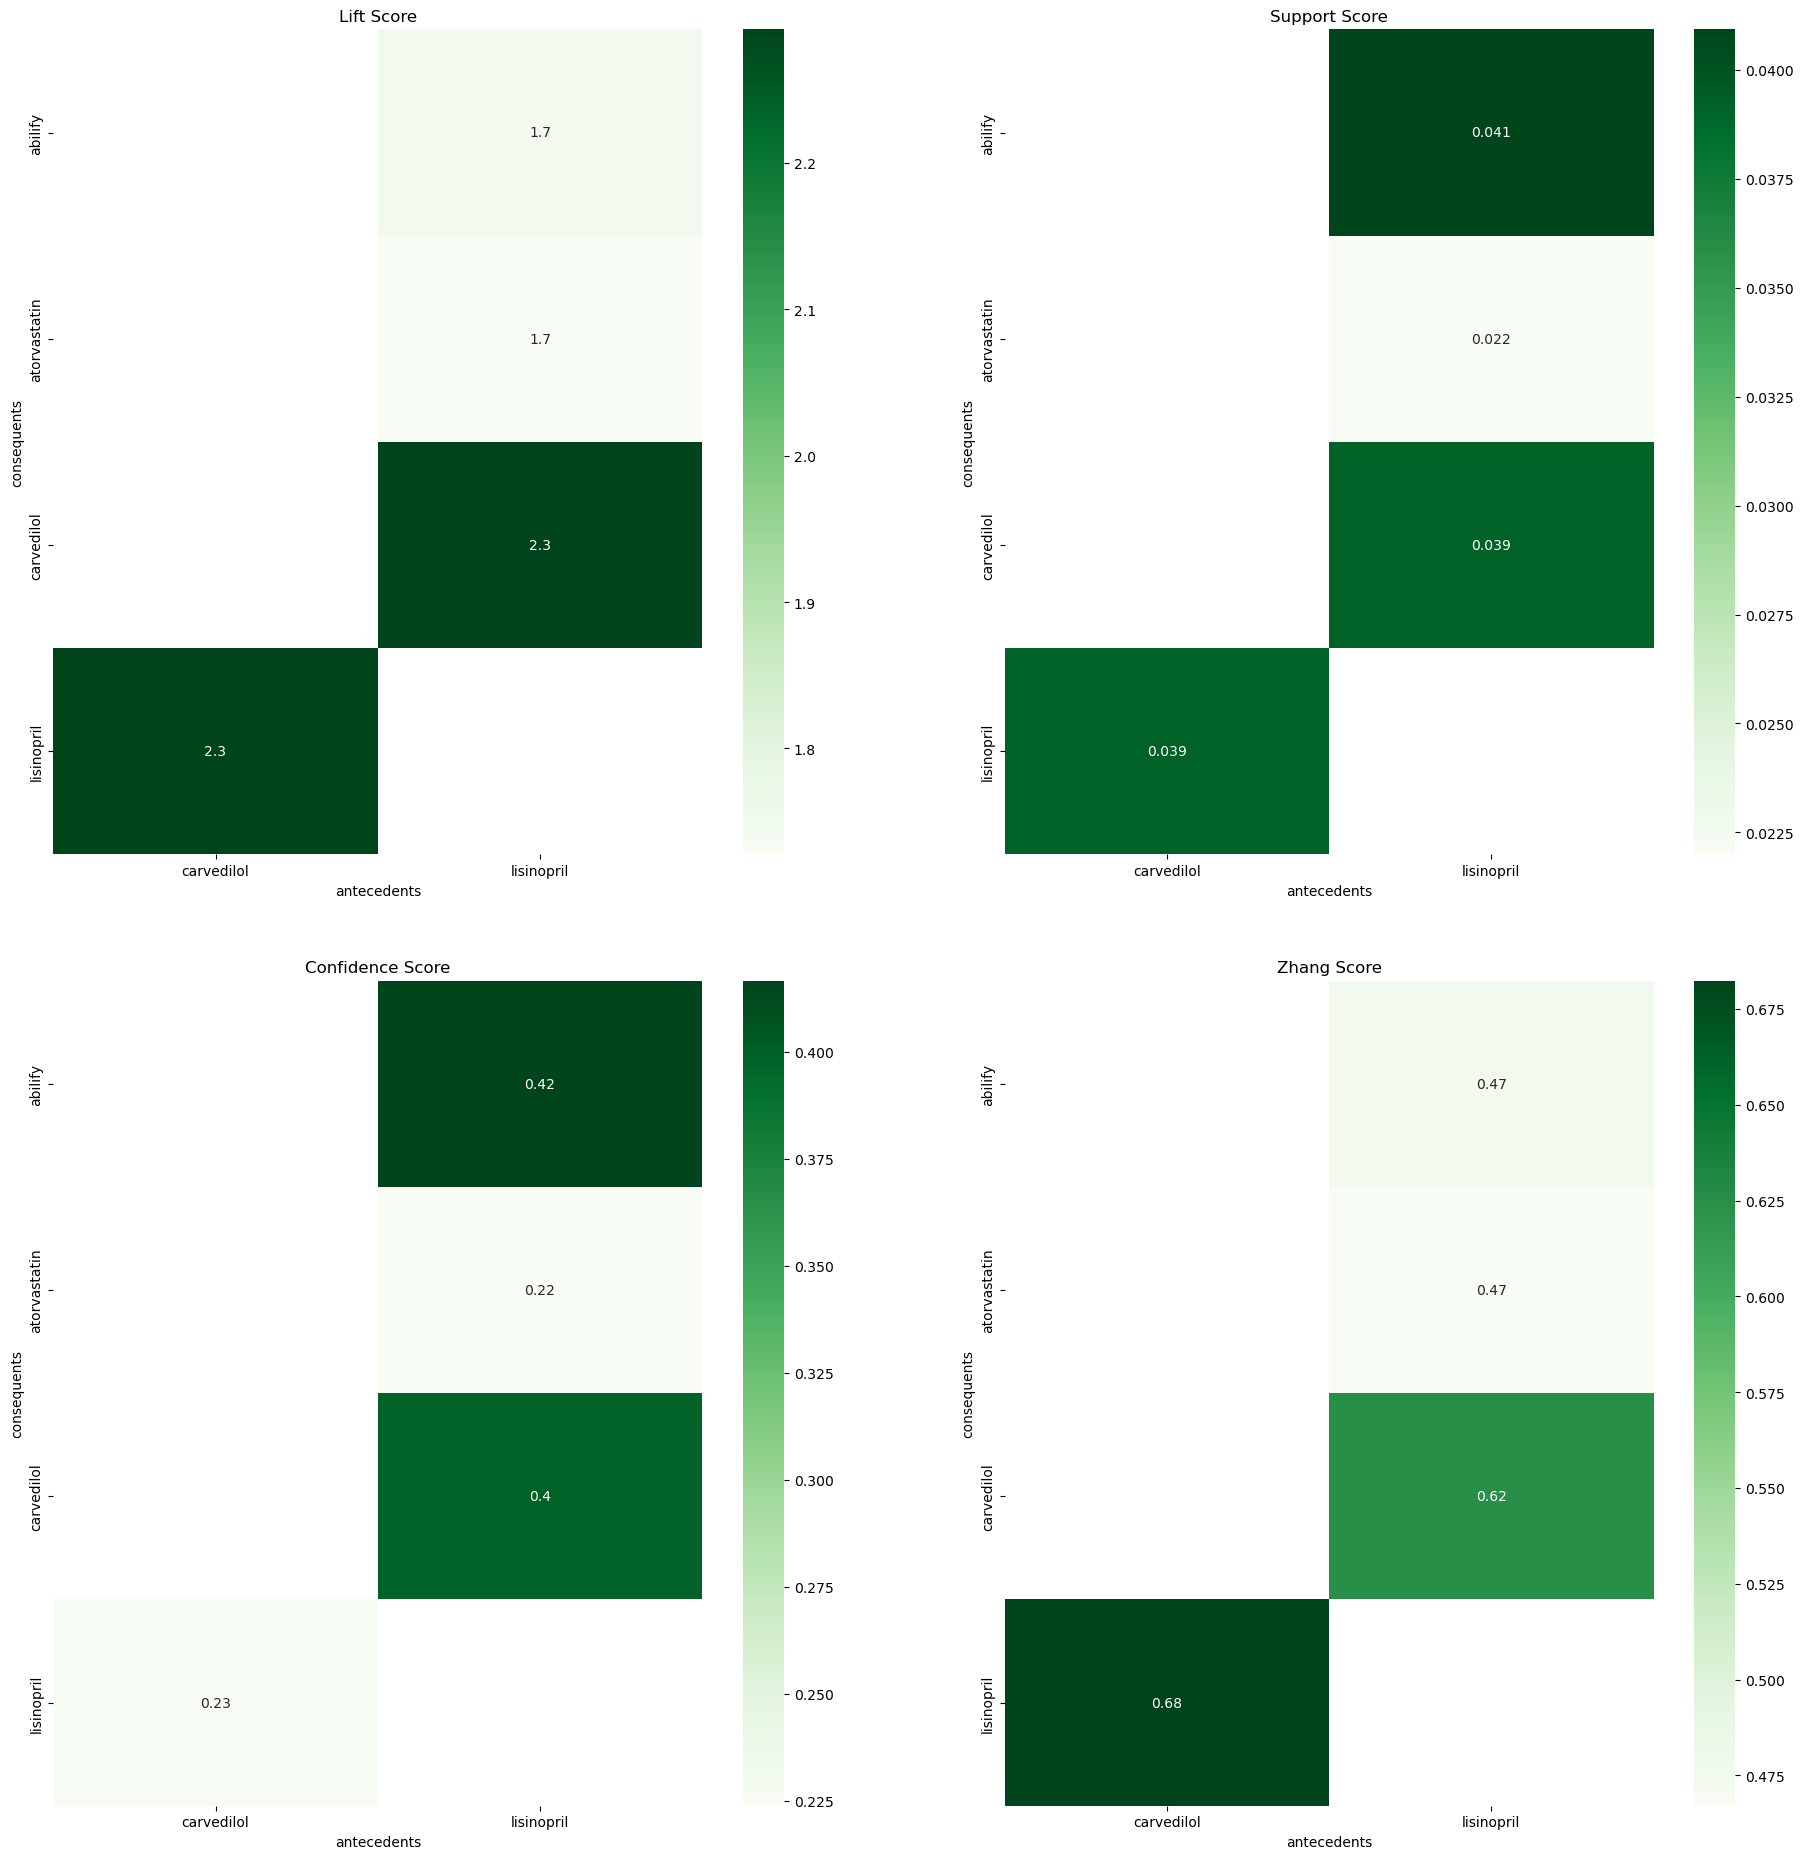

In [26]:
fig, axs = plt.subplots(figsize=(20, 20), nrows=2, ncols=2, sharex=False
                        ,sharey=False)

fig.tight_layout(pad=7.0)

# Create heatmaps.

sns.heatmap(data=lisi_lift_pivot, ax=axs[0,0], annot=True
            , cmap='Greens').set_title('Lift Score')
sns.heatmap(data=lisi_support_pivot, ax=axs[0,1], annot=True
            , cmap='Greens').set_title('Support Score')
sns.heatmap(data=lisi_confidence_pivot, ax=axs[1,0], annot=True
            , cmap='Greens').set_title('Confidence Score')
sns.heatmap(data=lisi_zhangs_pivot, ax=axs[1,1], annot=True
            , cmap='Greens').set_title('Zhang Score')


plt.show()

### Create a parallel plot to show the rules

<AxesSubplot:title={'center':'Parallel Plot for Rules'}>

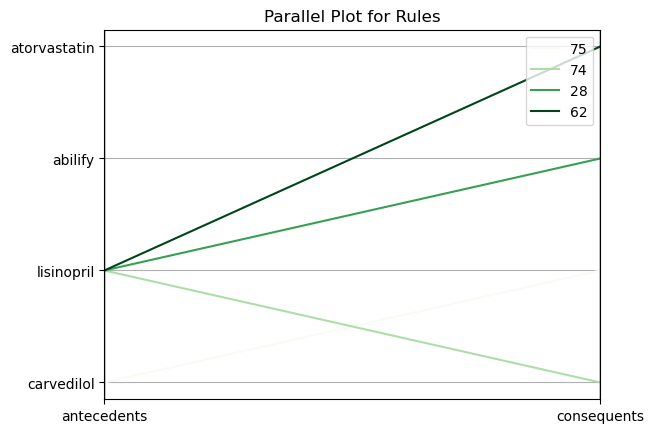

In [27]:
# Create a parallel Coordinates Plot

lisi_rules_df['rule'] = lisi_rules_df.index

# Define the coordinates and labels
coordinates = lisi_rules_df[['antecedents','consequents','rule']]

#print(coordinates)
par_plot = parallel_coordinates(coordinates, 'rule', colormap='Greens')
par_plot.set_title("Parallel Plot for Rules")

par_plot
